In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path_to_train='Train/'
path_to_test='Test/'

In [3]:
X_train=np.load(path_to_train+"X_train.npy")
y_train=np.load(path_to_train+"y_train.npy")
X_test=np.load(path_to_test+"X_test.npy")
y_test=np.load(path_to_test+"y_test.npy")

Необходимо бороться с несбалансированностью классов. Для этого воспользуемся методом NearMiss, который случайным образом избавляется от представителей классов, кототые преобладают в наборе данных. Данный метод уменьшает набор данных, что приведёт к более быстрому выполнению программы.

In [4]:
from imblearn.under_sampling import NearMiss

In [5]:
nm=NearMiss()
X_train_miss, y_train_miss=nm.fit_resample(X_train, y_train)

In [6]:
print(X_train_miss.shape, y_train_miss.shape)

(7405, 12000) (7405,)


## Машина опорных векторов

Работа метода заключается в рисовании линии между разными кластерами точек, которые нужно сгруппировать в классы. С одной стороны линии будут точки, принадлежащие одному классу, с другой - другому.
Классификатор будет пытаться увеличить расстояние между рисуемыми линиями и точками на разных сторонах, чтобы увеличить свою "уверенность" в определении класса.

In [7]:
from sklearn.svm import SVC

Попробуем различные ядра

In [8]:
#rbf

%%time
model = SVC()
model.fit(X_train_miss, y_train_miss)

Wall time: 2h 8min 1s


SVC()

In [9]:
%%time
y_train_pred = model.predict(X_train_miss)
y_test_pred = model.predict(X_test)
np.mean(y_train_miss != y_train_pred), np.mean(y_test != y_test_pred)

Wall time: 1h 2min 56s


(0.1912221471978393, 0.8224687933425797)

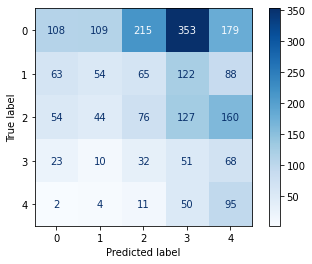

In [10]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
pass

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.43      0.11      0.18       964
           1       0.24      0.14      0.18       392
           2       0.19      0.16      0.18       461
           3       0.07      0.28      0.11       184
           4       0.16      0.59      0.25       162

    accuracy                           0.18      2163
   macro avg       0.22      0.26      0.18      2163
weighted avg       0.30      0.18      0.18      2163



По сравнению с методом ближайших соседей наши результаты на обучающей выборке улучшились в несколько раз. Но на тестовой выборке ошибка осталась такой же большой.

In [12]:
model = SVC(kernel = 'linear')
model.fit(X_train_miss, y_train_miss)

SVC(kernel='linear')

In [13]:
y_train_pred = model.predict(X_train_miss)
y_test_pred = model.predict(X_test)
np.mean(y_train_miss != y_train_pred), np.mean(y_test != y_test_pred)

(0.0002700877785280216, 0.739251040221914)

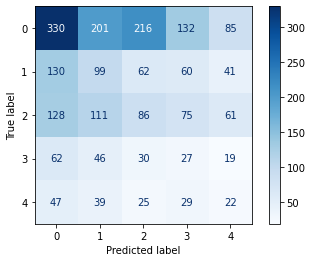

In [14]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
pass

In [15]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.47      0.34      0.40       964
           1       0.20      0.25      0.22       392
           2       0.21      0.19      0.20       461
           3       0.08      0.15      0.11       184
           4       0.10      0.14      0.11       162

    accuracy                           0.26      2163
   macro avg       0.21      0.21      0.21      2163
weighted avg       0.31      0.26      0.28      2163



Линейное ядро свело ошибку на обучающей выборке к 0, но на тестовой выборке ошибка всё так же велика.
Столкнулись с переобучением.

In [16]:
model = SVC(kernel = 'poly')
model.fit(X_train_miss, y_train_miss)

SVC(kernel='poly')

In [18]:
y_train_pred = model.predict(X_train_miss)
y_test_pred = model.predict(X_test)
np.mean(y_train_miss != y_train_pred), np.mean(y_test != y_test_pred)

(0.5459824442943957, 0.555709662505779)

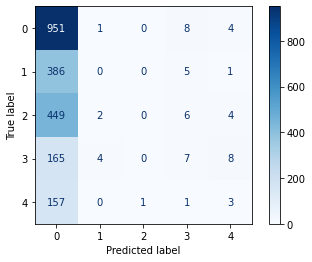

In [19]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
pass

In [20]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.45      0.99      0.62       964
           1       0.00      0.00      0.00       392
           2       0.00      0.00      0.00       461
           3       0.26      0.04      0.07       184
           4       0.15      0.02      0.03       162

    accuracy                           0.44      2163
   macro avg       0.17      0.21      0.14      2163
weighted avg       0.23      0.44      0.28      2163



На данный момент исследования метод SVM с полиномиальным ядром показал самый лучший результат. Ошибка снизилась до 55%, что тоже, правда, не является хорошим результатом.